## IMDB Reviews

In [7]:
#Importing IMDB dataset from Keras library. Here we're taking the most frequently used 10000 words
from tensorflow.keras.datasets import imdb
#Divind the dataset into training and test sets.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [8]:
#Just printing the 1st review in the training dataset.
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
#checking the lable of the 1st review. 
train_labels[0]
#In this case its 1 which means +ve review or good review.

1

In [10]:
max([max(sequence) for sequence in train_data])

9999

Decoding movie reviews and displaying in text

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review
#As we can see the 1st review is +ve for which the label is 1.

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**Defining function for Vectorization of data**

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
#After vectorization we got the data in 0s and 1s
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Model Our Building**




In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
#we are using two hidden layers each having 16 nodes and there just one node in output layer for the output either +ve or -ve. ReLu is used for hiddedn layers and sigmoid for output layer
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
#we're using RMSProp as optimizer, and binary crossentropy as loss function
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating approach**

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training our model**

In [ ]:
#we're training our model with 20 epochs with batch size 512
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.5096 - accuracy: 0.7903 - val_loss: 0.3799 - val_accuracy: 0.8718
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2978 - accuracy: 0.9076 - val_loss: 0.3026 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2198 - accuracy: 0.9305 - val_loss: 0.2785 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1758 - accuracy: 0.9439 - val_loss: 0.3056 - val_accuracy: 0.8742
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1433 - accuracy: 0.9561 - val_loss: 0.2884 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1211 - accuracy: 0.9639 - val_loss: 0.2962 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0966 - accuracy: 0.9716 - val_loss: 0.3081 - val_accuracy: 0.8824
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting training Vs validation loss**

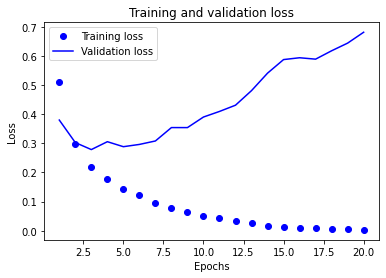

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Validation loss starts to increase from 3rd epoch and overfit. So we need to remodel using 3 or 4 epochs. 

Plotting training Vs validation accuracy

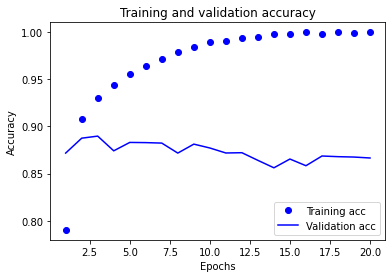

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Validation accuracy starts decreasing from around 3rd epoch. 

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Here we're using just 3epochs to retrain the model.
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 3s 30ms/step - loss: 0.4629 - accuracy: 0.8130
Epoch 2/3
49/49 [==============================] - 1s 30ms/step - loss: 0.2651 - accuracy: 0.9088
Epoch 3/3
782/782 [==============================] - 3s 4ms/step - loss: 0.2919 - accuracy: 0.8827


In [ ]:
results

[0.29194292426109314, 0.8827199935913086]

# 1) Using 1 and 3 hidden layers in the model

In [ ]:
#here we're using 3 hidden layers for which we used ReLu activation function and sigmoid for output layer.
model1_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#we're building model with just 1 hidden layer with ReLu activation function. 
model1_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
#using RMSProp and binary crossentropy for both scenarios (3 and 1 layers)
model1_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model1_1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# model fitting with 20 epochs and 512 batch size
history1_3 = model1_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history1_1 = model1_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5454 - accuracy: 0.7579 - val_loss: 0.4265 - val_accuracy: 0.8388
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3346 - accuracy: 0.8956 - val_loss: 0.3290 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2344 - accuracy: 0.9289 - val_loss: 0.3147 - val_accuracy: 0.8744
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1782 - accuracy: 0.9459 - val_loss: 0.3152 - val_accuracy: 0.8757
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1414 - accuracy: 0.9571 - val_loss: 0.2994 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1150 - accuracy: 0.9643 - val_loss: 0.3114 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0916 - accuracy: 0.9764 - val_loss: 0.3194 - val_accuracy: 0.8829
Epoch 8/20
30

Plotting training Vs validation loss

In [ ]:
historyp1_3 = history1_3.history
historyp1_3.keys()




dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
historyp1_1 = history1_1.history
historyp1_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting training Vs testing loss

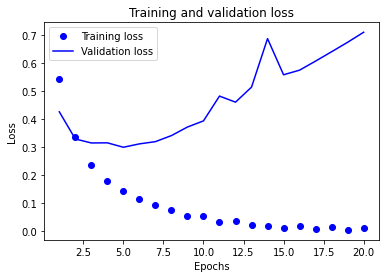

In [ ]:

historyp1_3 = history1_3.history
loss_values3 = historyp1_3["loss"]
val_loss_values3 = historyp1_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

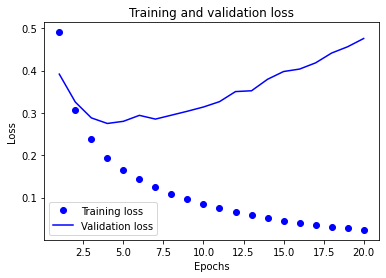

In [ ]:
historyp1_1 = history1_1.history
loss_values1 = historyp1_1["loss"]
val_loss_values1 = historyp1_1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting training Vs testing accuracy

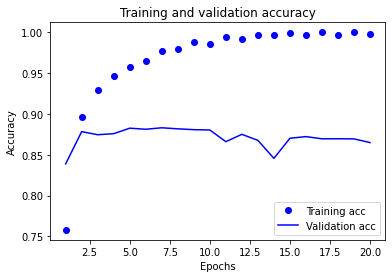

In [ ]:
plt.clf()
acc3 = historyp1_3["accuracy"]
val_acc3 = historyp1_3["val_accuracy"]
plt.plot(epochs, acc3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Adding more layers led to less accuracy.

When using 3 hidden layers accuracy increased till 2 epochs and then it starts to fluctuate.

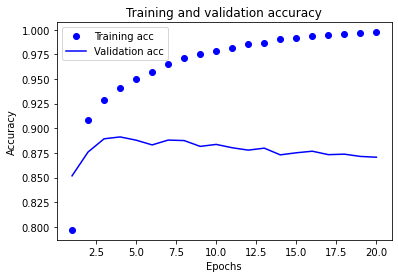

In [ ]:
plt.clf()
acc1 = historyp1_1["accuracy"]
val_acc1 = historyp1_1["val_accuracy"]
plt.plot(epochs, acc1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

When using 1 hidden layer validation accuracy starts decreasing from 4th epoch. 

# 2) Using 32 and 64 nodes in hidden layers

In [ ]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
hist2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.4857 - accuracy: 0.7873 - val_loss: 0.3336 - val_accuracy: 0.8763
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2627 - accuracy: 0.9044 - val_loss: 0.2804 - val_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1902 - accuracy: 0.9293 - val_loss: 0.2851 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1434 - accuracy: 0.9497 - val_loss: 0.3004 - val_accuracy: 0.8820
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1144 - accuracy: 0.9605 - val_loss: 0.3126 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0879 - accuracy: 0.9725 - val_loss: 0.3484 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0684 - accuracy: 0.9783 - val_loss: 0.3856 - val_accuracy: 0.8753
Epoch 8/20
30

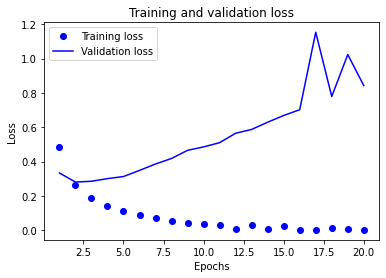

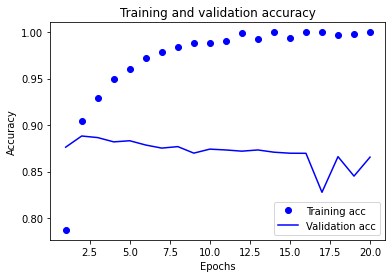

In [ ]:
histp2 = hist2.history
loss_values = histp2["loss"]
val_loss_values = histp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp2["accuracy"]
val_acc = histp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Validation accuracy increased from 3 epoch and gradual decrease.

# 3) Using MSE loss function instead of binary cross entropy





In [ ]:
model3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
#here we're using MSE loss function instead of binary cross entropy which he have used so far.
model3.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
hist3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.1714 - accuracy: 0.7860 - val_loss: 0.1220 - val_accuracy: 0.8709
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0938 - accuracy: 0.9034 - val_loss: 0.0941 - val_accuracy: 0.8915
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0677 - accuracy: 0.9273 - val_loss: 0.0854 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0520 - accuracy: 0.9446 - val_loss: 0.0822 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0420 - accuracy: 0.9569 - val_loss: 0.0819 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0341 - accuracy: 0.9668 - val_loss: 0.0830 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0275 - accuracy: 0.9733 - val_loss: 0.0928 - val_accuracy: 0.8737
Epoch 8/20
30

**Plotting training Vs testing loss**

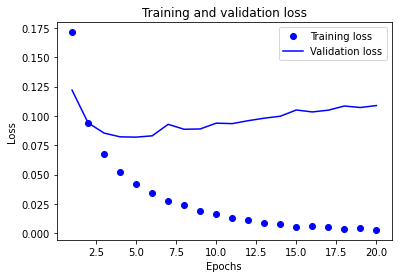

In [ ]:
histp3 = hist3.history
loss_values = histp3["loss"]
val_loss_values = histp3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

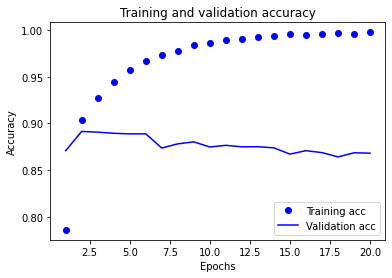

In [ ]:
plt.clf()
acc = histp3["accuracy"]
val_acc = histp3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Accuracy is more stable when used SME than binary_crossentropy.

When using MSE as loss function, validation accuracy starting dropping from 4th epoch. 

# **4) Using tanh activation function in place of ReLu**

In [ ]:
#we're using tanh activation function on hidden layers instead of ReLu and MSE loss function
model4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model4.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
hist4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.1570 - accuracy: 0.7935 - val_loss: 0.1132 - val_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0806 - accuracy: 0.9129 - val_loss: 0.0898 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0559 - accuracy: 0.9369 - val_loss: 0.0868 - val_accuracy: 0.8816
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0409 - accuracy: 0.9535 - val_loss: 0.0866 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0319 - accuracy: 0.9632 - val_loss: 0.0915 - val_accuracy: 0.8780
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0256 - accuracy: 0.9715 - val_loss: 0.0946 - val_accuracy: 0.8739
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0192 - accuracy: 0.9799 - val_loss: 0.0957 - val_accuracy: 0.8798
Epoch 8/20
30

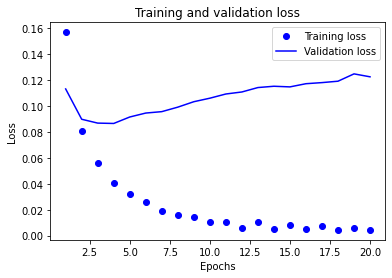

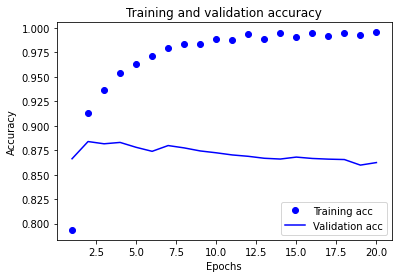

In [ ]:
histp4 = hist4.history
loss_values = histp4["loss"]
val_loss_values = histp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp4["accuracy"]
val_acc = histp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

validation loss increased more when used ReLu than Tanh and validation accuracy is more fluctuating in ReLu than Tanh.

# **5) Using Dropout technique in our network**

In [16]:
#we're using dropout method with two hidden layers with ReLu activation function on those
from tensorflow import keras
from tensorflow.keras import layers
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
hist5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.5946 - accuracy: 0.7013 - val_loss: 0.4519 - val_accuracy: 0.8535
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4439 - accuracy: 0.8235 - val_loss: 0.3512 - val_accuracy: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3573 - accuracy: 0.8724 - val_loss: 0.3155 - val_accuracy: 0.8764
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2983 - accuracy: 0.8940 - val_loss: 0.2799 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2546 - accuracy: 0.9157 - val_loss: 0.2758 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2164 - accuracy: 0.9262 - val_loss: 0.2778 - val_accuracy: 0.8912
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1930 - accuracy: 0.9361 - val_loss: 0.2842 - val_accuracy: 0.8904
Epoch 8/20
30

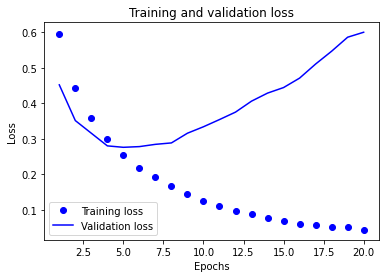

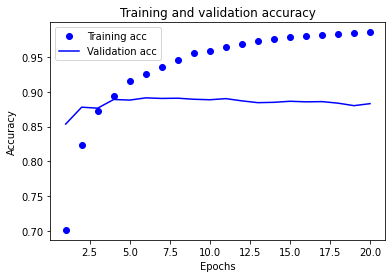

In [22]:
#Plotting graphs for training vs validation loss and training vs validation accuracy
import matplotlib.pyplot as plt
histp5 = hist5.history
loss_values = histp5["loss"]
val_loss_values = histp5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp5["accuracy"]
val_acc = histp5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Validation accuracy increases till 8 epochs and then decreases when using dropout with probability 0.5

---

